# Write a  Python program to get the latest number of confirmed, deaths, recovered and active cases of Novel Coronavirus (COVID-19) Country wise.

In [13]:
import pandas as pd
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')
covid_data['Active'] = covid_data['Confirmed'] - covid_data['Deaths'] - covid_data['Recovered']
result = covid_data.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
print(result) 

                       Country/Region  Confirmed  Deaths  Recovered  Active
0                         Afghanistan         26       0          1      25
1                             Albania         55       1          0      54
2                             Algeria         60       4         12      44
3                             Andorra         39       0          1      38
4                          Antarctica          0       0          0       0
5                 Antigua and Barbuda          1       0          0       1
6                           Argentina         68       2          3      63
7                             Armenia         78       0          1      77
8                               Aruba          3       0          0       3
9                           Australia        452       5         23     424
10                            Austria        999       3          1     995
11                         Azerbaijan         28       1          6      21
12          

In [14]:
india_data = covid_data[covid_data['Country/Region'] == 'India']
india_data

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Active
73,NaN,India,2020-03-17T15:33:06,142,3,14,20.5937,78.9629,125


# Write a  Python program to get the latest number of confirmed deaths and recovered people of Novel Coronavirus (COVID-19) cases Country/Region - Province/State wise.

In [16]:
import pandas as pd
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-16-2020.csv')
india_data = covid_data[covid_data['Country/Region'] == 'India']
data = covid_data.groupby(['Country/Region', 'Province/State'])[['Confirmed', 'Deaths', 'Recovered']].max()
pd.set_option('display.max_rows', None)
print(data)

                                             Confirmed  Deaths  Recovered
Country/Region Province/State                                            
Australia      Australian Capital Territory          2       0          0
               From Diamond Princess                 0       0          0
               New South Wales                     171       2          4
               Northern Territory                    1       0          0
               Queensland                           68       0          8
               South Australia                      29       0          3
               Tasmania                              7       0          0
               Victoria                             71       0          8
               Western Australia                    28       1          0
Canada         Alberta                              56       0          0
               British Columbia                    103       4          4
               Grand Princess         

# Write a Python program to visualize the state/province wise Active cases of Novel Coronavirus (COVID-19) in USA.

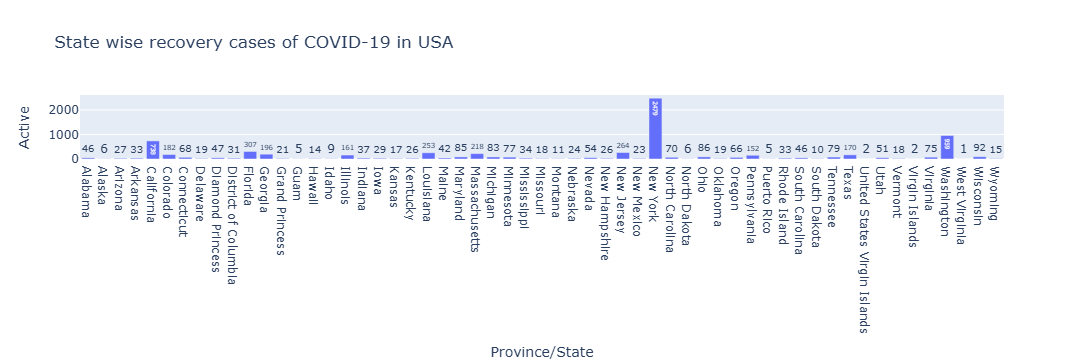

In [28]:
import pandas as pd
import plotly.express as px
 
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-18-2020.csv')
covid_data['Active'] = covid_data['Confirmed'] - covid_data['Deaths'] - covid_data['Recovered']
us_data = covid_data[covid_data['Country/Region']=='US'].drop(['Country/Region','Latitude', 'Longitude'], axis=1)
# us_data = us_data[us_data.sum(axis = 1) > 0]
us_data = us_data[us_data.select_dtypes(include='number').sum(axis=1) > 0]

us_data = us_data.groupby(['Province/State'])['Active'].sum().reset_index()
us_data_death = us_data[us_data['Active'] > 0]

state_fig = px.bar(us_data_death, x='Province/State', y='Active', title='State wise recovery cases of COVID-19 in USA', text='Active')
state_fig.show()